## Importações

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

## Data Frame

In [3]:
filename = 'netflix_titles.csv'
df_full = pd.read_csv(filename)

In [4]:
#Filtragem por tipo, título, diretor, elenco e gêneros
df = df_full.dropna(subset = ['type', 'title', 'director', 'cast', 'listed_in'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [5]:
#Separando por filmes e séries
df_movies = df.loc[df['type'] == 'Movie', ['title', 'director', 'cast', 'listed_in']]
df_tv = df.loc[df['type'] == 'TV Show', ['title', 'director', 'cast', 'listed_in']]
df_movies.head()

,title,director,cast,listed_in
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Children & Family Movies
7,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Dramas, Independent Movies, International Movies"
9,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","Comedies, Dramas"
12,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Dramas, International Movies"
13,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...","Children & Family Movies, Comedies"


In [6]:
df_movies.dtypes

title        object
director     object
cast         object
listed_in    object
dtype: object

{'Children & Family Movies': 583, 'Dramas': 2398, 'Independent Movies': 751, 'International Movies': 2548, 'Comedies': 1636, 'Thrillers': 575, 'Romantic Movies': 604, 'Music & Musicals': 328, 'Horror Movies': 352, 'Sci-Fi & Fantasy': 237, 'Action & Adventure': 848, 'Classic Movies': 109, 'Anime Features': 68, 'Documentaries': 418, 'Sports Movies': 163, 'Cult Movies': 70, 'Faith & Spirituality': 60, 'LGBTQ Movies': 83, 'Stand-Up Comedy': 318}


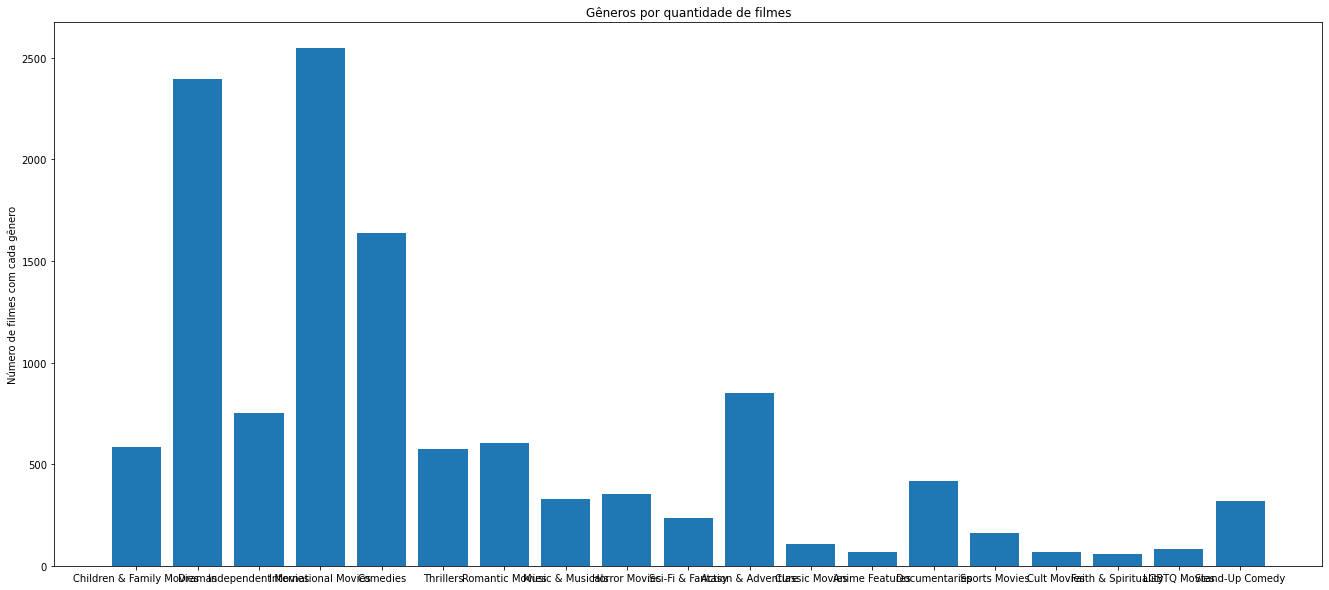

In [7]:
#Separação por gêneros
generos = ['Children & Family Movies', 'Dramas', 'Independent Movies', 'International Movies', 'Comedies', 'Thrillers', 
           'Romantic Movies', 'Music & Musicals', 'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure', 'Classic Movies', 
           'Anime Features', 'Documentaries', 'Sports Movies', 'Cult Movies', 'Faith & Spirituality', 'LGBTQ Movies', 
           'Stand-Up Comedy']

#Criando um dicionário com o gênero e sua quantidade de filmes
dic_generos = {}

for i in df_movies['listed_in']:
    for genero in generos:
        if genero in i:
            if genero in dic_generos.keys():
                dic_generos[genero] += 1
            else:
                dic_generos[genero] = 1
print(dic_generos)

#Plotando o dicionário em um histograma
plt.figure(figsize=(50, 10))

plt.subplot(121)

plt.bar(range(len(generos)), dic_generos.values())
plt.title("Gêneros por quantidade de filmes")
plt.ylabel("Número de filmes com cada gênero")
plt.xticks(range(len(generos)), dic_generos.keys())
plt.show()
#As barras do gráfico estão na ordem do dicionário impresso